In [3]:
import torch
import numpy as np
import pandas as pd
import os
import sys
import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('..')
from importlib import reload
import utils

In [46]:
#baseline = utils.get_baseline_correlation('../data/tournaments_2012-03-16_2020-03-16.csv')
#baseline.to_csv('../data/baseline.csv')
baseline = pd.read_csv('../data/baseline.csv', index_col=0).dropna()
baseline.head()

,id,corr
0,1818,0.860727
1,1832,0.884632
2,1845,0.880637
3,1850,0.780791
4,1856,0.835407


In [74]:
histories = glob.glob('../checkpoints/*.csv')
histories

['../checkpoints/model_momentum=0_wd=0_logsigmoid.csv',
 '../checkpoints/model_head_wd=1e-12.csv',
 '../checkpoints/model_momentum=0.9_wd=0.csv',
 '../checkpoints/model_momentum=0_wd=0.csv',
 '../checkpoints/model_fixed_head.csv',
 '../checkpoints/model_head_wd=0.csv',
 '../checkpoints/model_head_wd=1e-4.csv',
 '../checkpoints/model.csv']

In [88]:
history = pd.read_csv(histories[2], index_col=0)
history = history.dropna()
history = pd.merge(history, baseline, left_on='tournament_id', right_on='id')
print(len(history))
history.head()

3594


,epoch,tournament_id,loss,correlation_before,correlation_after,id,corr
0,1,1832,0.984805,0.758579,0.919861,1832,0.884632
1,2,1845,0.960634,0.691458,0.833804,1845,0.880637
2,3,1850,0.005634,0.694859,0.712984,1850,0.780791
3,4,1856,0.950896,0.589185,0.663957,1856,0.835407
4,5,1897,0.008172,0.368499,0.361246,1897,0.784087


In [91]:
history.correlation_before.describe()

count    3594.000000
mean        0.757585
std         0.143550
min        -0.500000
25%         0.714286
50%         0.791947
75%         0.840448
max         1.000000
Name: correlation_before, dtype: float64

In [50]:
history['corr'].describe()

count    3594.000000
mean        0.801726
std         0.140762
min        -1.000000
25%         0.765572
50%         0.841888
75%         0.883326
max         1.000000
Name: corr, dtype: float64

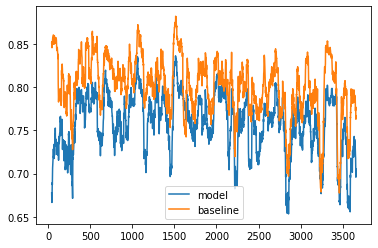

In [54]:
# plt.plot(history.epoch, history.correlation_before)
roll = 40
plt.plot(history.epoch, history.correlation_before.rolling(roll).mean(), label='model')
plt.plot(history.epoch, history['corr'].rolling(roll).mean(), label='baseline')
plt.legend()
plt.show()